In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [14]:
from sklearn.datasets import make_classification

In [15]:
X,y=make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

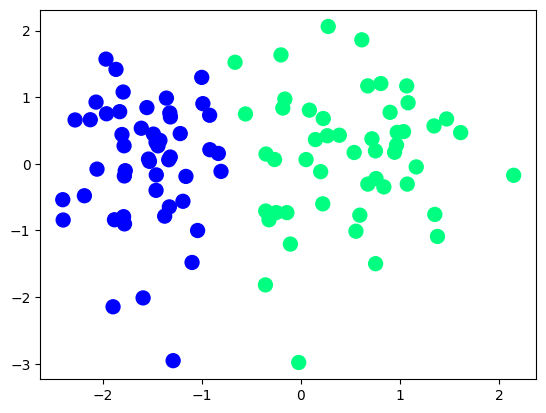

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

in perceptron mean we ask with each pint whather they are in positve region or negative region

you use logistic regression when the data is linearnly classified mean
e.g cgpa|iq|placed there are studenmt one side who got placed and other side who not get placement



e.g cgpa | iq |placed

and we know that eqaution of line for 2d Ax+By+c = 0

where A=w1

B=w2

c=w0

so w0+w1x1+w2x2  =0

(> 0 =  got placed <0=not get placed (0))





algorithm

for i in range (epochs):

    randomly select a student

    if xi is belong to negative region  and sum of i=0 to 2 wixi > =0

    # then placemebt not happen
    W=W- lr *xi


    if xi is belong to P and sum of i =0 to 2 wi .xi < 0

    # then placement taken mean point is positive placed in negative region

    w = w+lr* xi



[w0 w1 w2 ]  [x0 x1 x2]^T

where x0 =1

simplified

for i in range(epochs):

    randomly select a student

    w=w +lr .(yi-y_hat)xi


yi =actual | y_hat =predict | (yi-y_hat)

1 1 0  wnew =wold

0 0 0  wnew =wold

1 0 1  wnew =wold + lr. xi

0 1 -1  wnew = wold -lr.xi




In [17]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

**def perceptron(X, y)**:: This line defines the function perceptron that takes two arguments: X (the input features) and y (the true labels).

**X = np.insert(X, 0, 1, axis=1)**: This line adds a column of ones to the beginning of the X array. This is done to incorporate the bias term (w0) into the weight vector, allowing the bias to be treated like any other weight during the update rule.

**weights = np.ones(X.shape[1])**: This line initializes the weight vector with all ones. The size of the weight vector is determined by the number of columns in the modified X (which is the original number of features plus one for the bias).
lr = 0.1: This line sets the learning rate (lr) to 0.1. The learning rate controls the step size during weight updates.

**for i in range(1000)**:: This loop iterates 1000 times, representing the training epochs. In each epoch, the algorithm processes a randomly selected data point.
j = np.random.randint(0, 100): This line randomly selects an index j between 0 and 99 (inclusive) to pick a data point from the dataset.

**y_hat = step(np.dot(X[j], weights))**: This line calculates the predicted output (y_hat) for the selected data point X[j]. It does this by:

Calculating the dot product of the data point X[j] and the current weights.
Passing the result through the step function (which you've defined in another cell) to get a binary prediction (0 or 1).

**weights = weights + lr .(y[j] - y_hat) . X[j]** : This is the core of the perceptron learning rule. It updates the weights based on the error between the true label (y[j]) and the predicted label (y_hat):

**If the prediction is correct (y[j] - y_hat is 0**), the weights are not updated.
If the prediction is incorrect, the weights are adjusted in the direction that reduces the error. The magnitude of the adjustment is controlled by the learning rate and the values of the input features X[j].


**return weights[0], weights[1:]**: After the training loop finishes, the function returns the learned bias (the first element of the weights vector) and the learned weights for the original features (the remaining elements of the weights vector).


In [18]:
def step(z):
    return 1 if z>0 else 0

In [19]:

intercept_,coef_ = perceptron(X,y)



In [20]:
print(coef_)
print(intercept_)

[1.41397636 0.02907023]
0.9


In [21]:
# m= -A/B

# b= -C/b

m= -(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

In [22]:
m

np.float64(-48.640019637662796)

In [23]:
b

np.float64(-30.95951174444745)

In [24]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

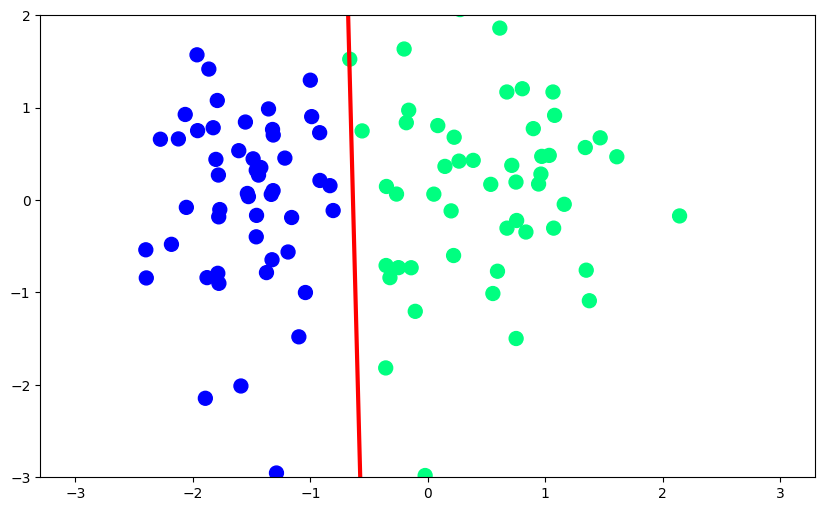

In [30]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [31]:
def perceptron(X,y): # genral code

    m = []
    b = []

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [32]:
m,b = perceptron(X,y)

In [33]:
# by logistic regression
lr=LogisticRegression()
lr.fit(X,y)


LogisticRegression()

In [34]:
lr.coef_

array([[3.50144121, 0.02773483]])

In [35]:
lr.intercept_

array([2.25106636])

In [36]:
m= -(lr.coef_[0][0]/lr.coef_[0][1])
b= -(lr.intercept_[0]/lr.coef_[0][1])

In [37]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

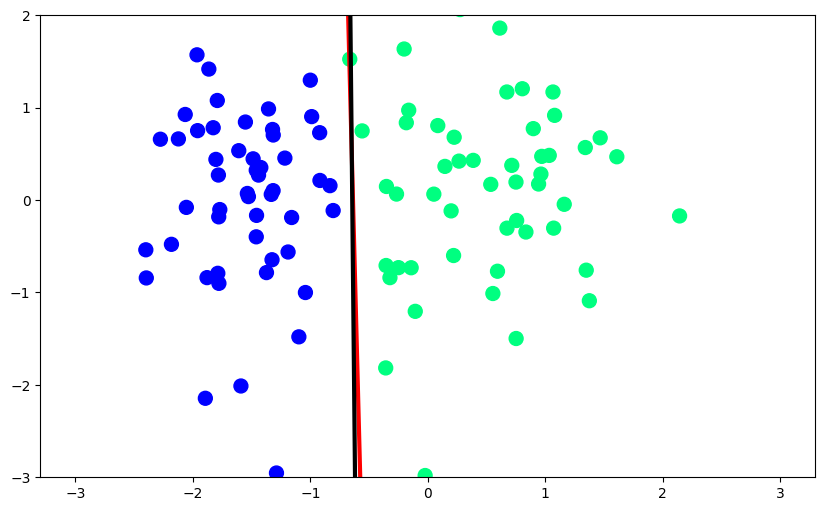

In [39]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

In [40]:
accuracy_score(y,lr.predict(X))

0.99